In [6]:
import cv2 
from datetime import timedelta
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import os
from path import Path
from sklearn.metrics import classification_report
import tensorflow as tf
import time

Import the objects and methods from my_classifier

%run my_classifier.ipynb

In [14]:
# my_classifier = os.getcwd()+'\\my_classifier.ipynb'
# #if you want to change
# # os.chdir('G:/a-2017-master')
# # # if you want to list dir
# # os.listdir()
# my_classifier.get_labels()

In [8]:
# Start the timer to record how long it takes for the whole script to be finished
start_script = time.monotonic()

In [9]:
images = 3600 # Change this number when new images are introduced
true_labels = get_labels()

X_train, X_val, y_train, y_val = [], [], [], []

# Segment each image in the training data
for img_nr in range(len(segmented_images)):
    if img_nr < 2880: #train data: 80% 
        X_train.append(segmented_images[img_nr])
        y_train.append(true_labels[img_nr])
    else: # test data: 20%
        X_val.append(segmented_images[img_nr])
        y_val.append(true_labels[img_nr])
        
y_val_labels = y_val
X_train = np.array(X_train).reshape(2880, 30, 40, 1)
X_val = np.array(X_val).reshape(720, 30, 40, 1)
y_train = to_categorical(np.array(y_train))
y_val = to_categorical(np.array(y_val))

In [10]:
# Start the timer to record how long it takes for the neural network to be finished.
start_nn = time.monotonic()

In [11]:
# Create model
model = Sequential()

# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape = (30,40,1)))
#model.add(Conv2D(32, kernel_size=3, activation = 'relu'))

# The connections between the layers
model.add(Flatten())

# Output layer. softmax makes the output to sum up to 1; they can be interpreted as probabilites
model.add(Dense(3, activation = 'softmax')) 

In [12]:
# Compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=[tf.keras.metrics.Accuracy()])

In [13]:
#train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3)

Epoch 1/3
90/90 [==============================] - 3s 26ms/step - loss: 9.6834 - accuracy: 0.8999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
90/90 [==============================] - 2s 22ms/step - loss: 0.4284 - accuracy: 0.9994 - val_loss: 0.0725 - val_accuracy: 0.9991
Epoch 3/3
90/90 [==============================] - 2s 24ms/step - loss: 0.0159 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [15]:
pred = model.predict(X_val)
classifier = []

for i in range(len(pred)):
    for j in range(len(pred[i])):
        if pred[i][j] == 1:
            classifier.append(j)
            break

23/23 [==============================] - 0s 10ms/step

 The metrics of the model is the following: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       229
           2       1.00      1.00      1.00       258

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720
. 

 Elapsed time (neural network): 7.4 seconds, and 
 elapsed time (script):         7.5. 

 The first 20 numbers of the classifier (y_pred):     [1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2], 
 the first 20 numbers of the actual numbers (y_val): [1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2], and 
 a visualaztion of the 20 first numbers from y_val and their respective classification: 



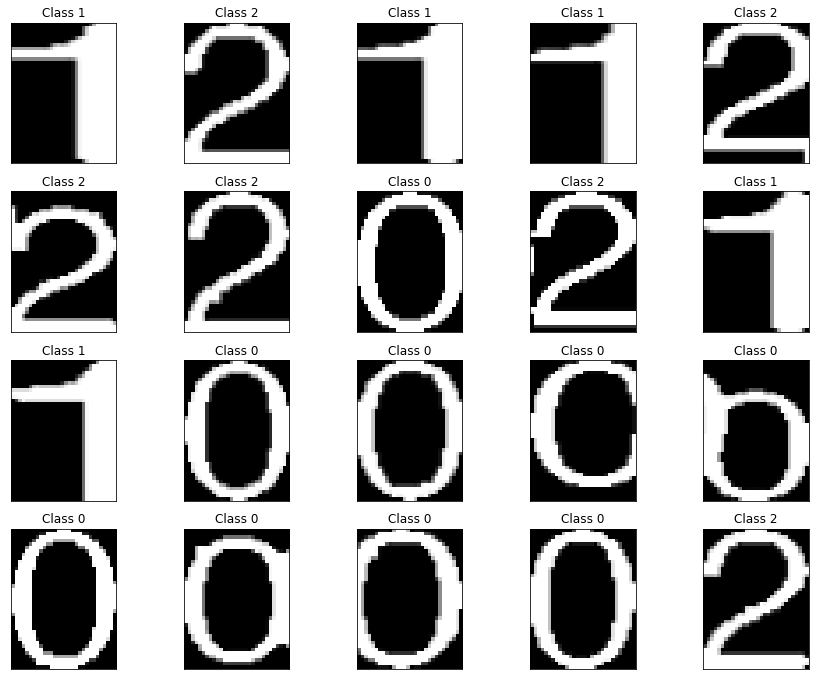

In [16]:
end_time = time.monotonic()
y_pred = model.predict(X_val, verbose=1)
start = 2880
end = 2900

print(f'\n The metrics of the model is the following: \n\n {classification_report(y_val_labels, classifier)}. \n\n Elapsed time (neural network): {round(timedelta(seconds=end_time - start_nn).total_seconds(),1)} seconds, and \n elapsed time (script):         {round(timedelta(seconds=end_time - start_script).total_seconds(),1)}. \n\n The first 20 numbers of the classifier (y_pred):     {classifier[:20]}, \n the first 20 numbers of the actual numbers (y_val): {y_val_labels[:20]}, and \n a visualaztion of the 20 first numbers from y_val and their respective classification: \n')
visual_comparison(segmented_images, classifier[:20], start, end)